<a href="https://colab.research.google.com/github/drcrajc/iu_infandcasuality/blob/main/iccode4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Smoking-Lung Cancer Causal Graph with Back-door Paths...


<ipython-input-1-1523ef8fd93f>:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


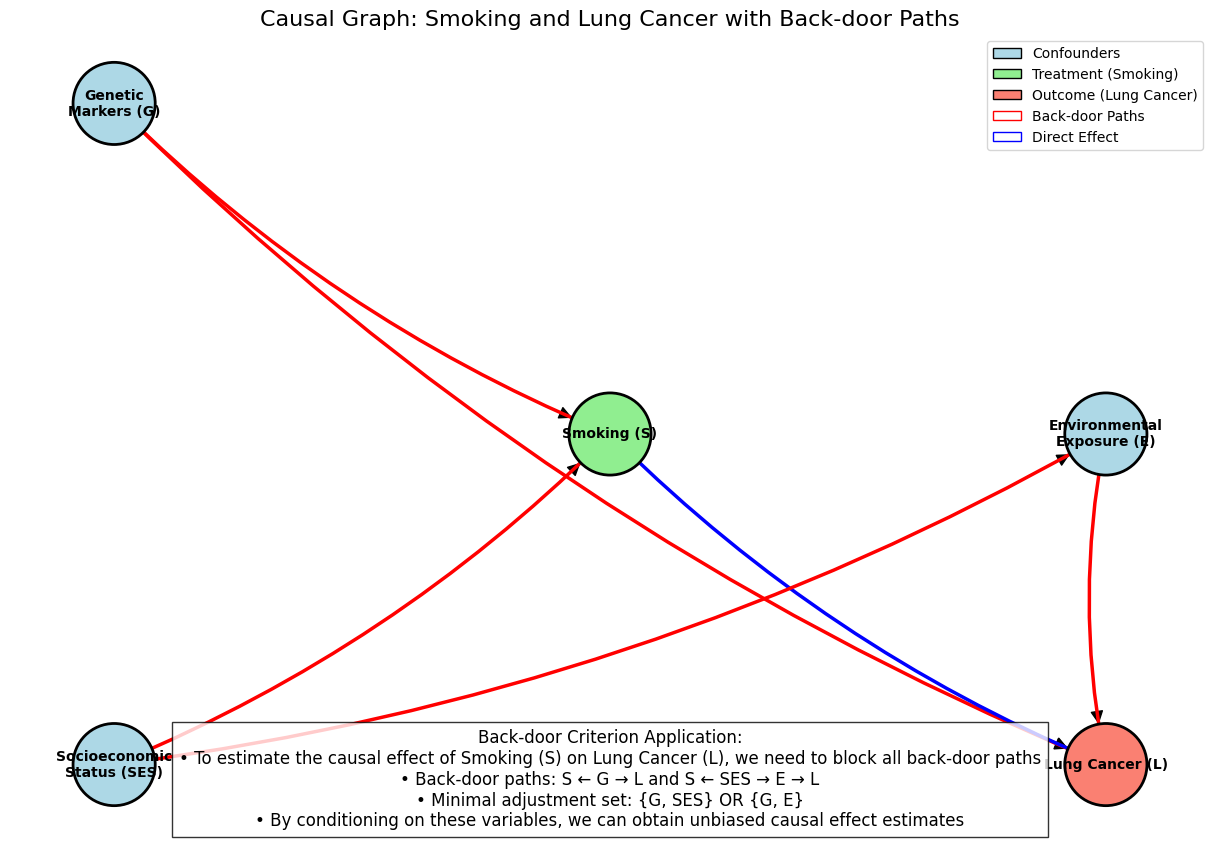


Generating Adjustment Sets Comparison...


<Figure size 640x480 with 0 Axes>

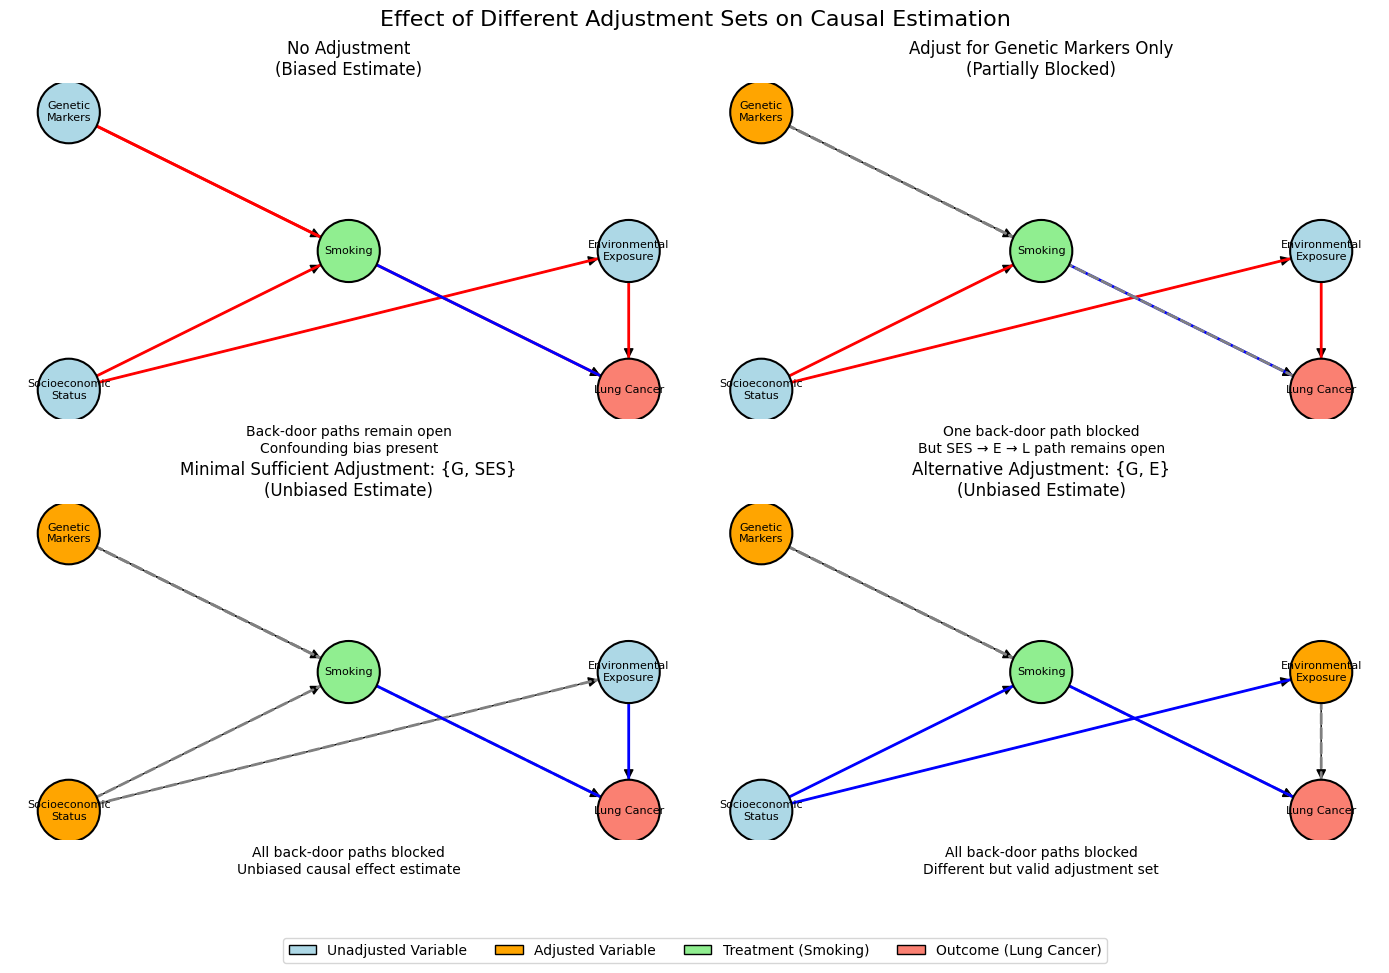

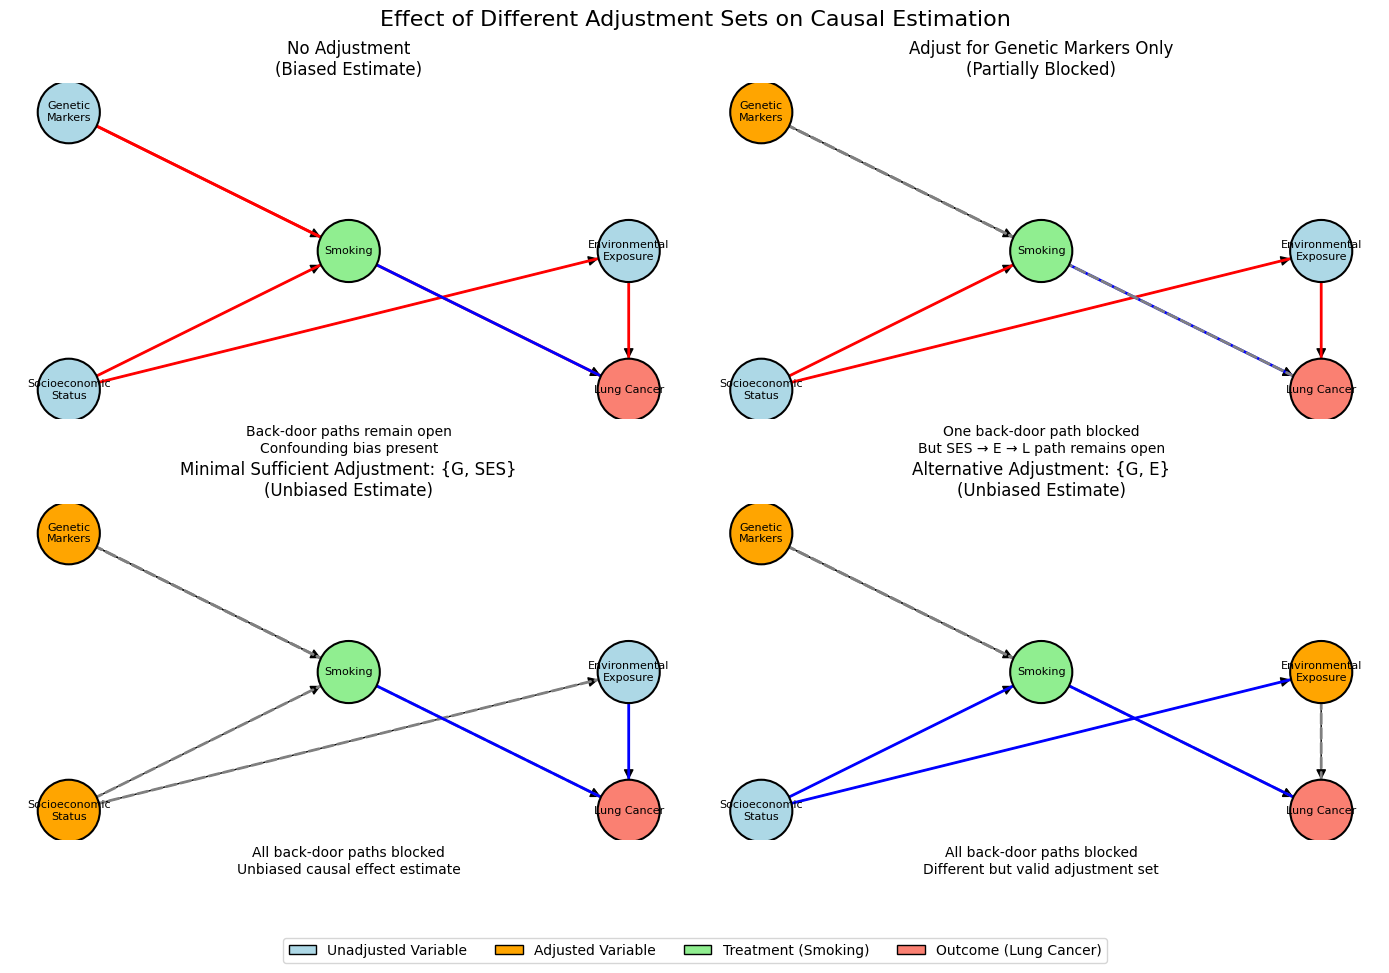

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def create_backdoor_smoking_graph():
    """
    Creates a causal graph for smoking and lung cancer with the back-door criterion
    """
    # Create directed graph
    G = nx.DiGraph()

    # Define nodes
    nodes = [
        "Genetic\nMarkers (G)",
        "Smoking (S)",
        "Environmental\nExposure (E)",
        "Socioeconomic\nStatus (SES)",
        "Lung Cancer (L)"
    ]

    for node in nodes:
        G.add_node(node)

    # Define edges (causal relationships)
    edges = [
        ("Genetic\nMarkers (G)", "Smoking (S)"),
        ("Genetic\nMarkers (G)", "Lung Cancer (L)"),
        ("Smoking (S)", "Lung Cancer (L)"),
        ("Environmental\nExposure (E)", "Lung Cancer (L)"),
        ("Socioeconomic\nStatus (SES)", "Smoking (S)"),
        ("Socioeconomic\nStatus (SES)", "Environmental\nExposure (E)")
    ]

    G.add_edges_from(edges)

    # Create the figure
    plt.figure(figsize=(12, 8))

    # Define node positions
    pos = {
        "Genetic\nMarkers (G)": (1, 2),
        "Smoking (S)": (2, 1),
        "Environmental\nExposure (E)": (3, 1),
        "Socioeconomic\nStatus (SES)": (1, 0),
        "Lung Cancer (L)": (3, 0)
    }

    # Node colors based on variable type
    node_colors = {
        "Genetic\nMarkers (G)": "lightblue",
        "Smoking (S)": "lightgreen",
        "Environmental\nExposure (E)": "lightblue",
        "Socioeconomic\nStatus (SES)": "lightblue",
        "Lung Cancer (L)": "salmon"
    }

    colors = [node_colors[node] for node in G.nodes()]

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3500,
            font_size=10, font_weight='bold', arrowsize=20,
            connectionstyle='arc3,rad=0.1', edgecolors='black', linewidths=2)

    # Highlight back-door paths
    backdoor_edges = [
        ("Genetic\nMarkers (G)", "Smoking (S)"),
        ("Genetic\nMarkers (G)", "Lung Cancer (L)"),
        ("Socioeconomic\nStatus (SES)", "Smoking (S)"),
        ("Socioeconomic\nStatus (SES)", "Environmental\nExposure (E)"),
        ("Environmental\nExposure (E)", "Lung Cancer (L)")
    ]

    # Redraw the edges with different colors for back-door paths
    for u, v in G.edges():
        if (u, v) in backdoor_edges:
            # Draw back-door edges in red
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.5,
                                  edge_color='red', connectionstyle='arc3,rad=0.1',
                                  arrowsize=20)
        else:
            # Draw direct effect edge in blue
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.5,
                                  edge_color='blue', connectionstyle='arc3,rad=0.1',
                                  arrowsize=20)

    # Add title and legend
    plt.title("Causal Graph: Smoking and Lung Cancer with Back-door Paths", fontsize=16)

    # Add legend
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Confounders'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Treatment (Smoking)'),
        Patch(facecolor='salmon', edgecolor='black', label='Outcome (Lung Cancer)'),
        Patch(facecolor='white', edgecolor='red', label='Back-door Paths'),
        Patch(facecolor='white', edgecolor='blue', label='Direct Effect')
    ]

    plt.legend(handles=legend_elements, loc='upper right')

    # Add explanatory text for back-door criterion
    explanation_text = (
        "Back-door Criterion Application:\n"
        "• To estimate the causal effect of Smoking (S) on Lung Cancer (L), we need to block all back-door paths\n"
        "• Back-door paths: S ← G → L and S ← SES → E → L\n"
        "• Minimal adjustment set: {G, SES} OR {G, E}\n"
        "• By conditioning on these variables, we can obtain unbiased causal effect estimates"
    )

    plt.figtext(0.5, 0.01, explanation_text, ha="center", fontsize=12,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig('smoking_cancer_backdoor.png', dpi=300)
    plt.show()

    return plt.gcf()

# Visualization 2: Adjustment Sets Comparison
def visualize_adjustment_sets():
    """
    Visualizes different adjustment sets and their effects on causal estimation
    """
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Effect of Different Adjustment Sets on Causal Estimation', fontsize=16)

    # Common base graph structure
    def create_base_graph():
        G = nx.DiGraph()
        nodes = ["G", "S", "E", "SES", "L"]
        G.add_nodes_from(nodes)
        edges = [
            ("G", "S"), ("G", "L"), ("S", "L"),
            ("E", "L"), ("SES", "S"), ("SES", "E")
        ]
        G.add_edges_from(edges)
        return G

    # Node positions
    pos = {
        "G": (1, 2),
        "S": (2, 1),
        "E": (3, 1),
        "SES": (1, 0),
        "L": (3, 0)
    }

    # Node labels
    labels = {
        "G": "Genetic\nMarkers",
        "S": "Smoking",
        "E": "Environmental\nExposure",
        "SES": "Socioeconomic\nStatus",
        "L": "Lung Cancer"
    }

    # 1. No adjustment (biased estimate)
    G1 = create_base_graph()

    # Define node colors - default all variables as normal
    node_colors = ["lightblue", "lightgreen", "lightblue", "lightblue", "salmon"]

    nx.draw(G1, pos, ax=axs[0, 0], with_labels=False, node_color=node_colors,
            node_size=2000, font_size=8, arrowsize=15,
            edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[0, 0].text(pos[node][0], pos[node][1], label,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=8)

    # Highlight back-door paths
    backdoor_edges1 = [("G", "S"), ("G", "L"), ("SES", "S"), ("SES", "E"), ("E", "L")]
    other_edges1 = [edge for edge in G1.edges() if edge not in backdoor_edges1]

    nx.draw_networkx_edges(G1, pos, ax=axs[0, 0], edgelist=backdoor_edges1,
                          width=2, edge_color='red', arrowsize=15)
    nx.draw_networkx_edges(G1, pos, ax=axs[0, 0], edgelist=other_edges1,
                          width=2, edge_color='blue', arrowsize=15)

    axs[0, 0].set_title('No Adjustment\n(Biased Estimate)', fontsize=12)
    axs[0, 0].text(0.5, -0.1, "Back-door paths remain open\nConfounding bias present",
                 ha='center', transform=axs[0, 0].transAxes, fontsize=10)

    # 2. Adjust for Genetic Markers only (partially blocked)
    G2 = create_base_graph()

    # Define node colors - highlight genetic markers as adjusted
    node_colors = ["orange", "lightgreen", "lightblue", "lightblue", "salmon"]

    nx.draw(G2, pos, ax=axs[0, 1], with_labels=False, node_color=node_colors,
            node_size=2000, font_size=8, arrowsize=15,
            edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[0, 1].text(pos[node][0], pos[node][1], label,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=8)

    # Highlight remaining back-door path
    backdoor_edges2 = [("SES", "S"), ("SES", "E"), ("E", "L")]
    other_edges2 = [("S", "L")]
    blocked_edges2 = [("G", "S"), ("G", "L")]

    nx.draw_networkx_edges(G2, pos, ax=axs[0, 1], edgelist=backdoor_edges2,
                          width=2, edge_color='red', arrowsize=15)
    nx.draw_networkx_edges(G2, pos, ax=axs[0, 1], edgelist=other_edges2,
                          width=2, edge_color='blue', arrowsize=15)
    nx.draw_networkx_edges(G2, pos, ax=axs[0, 1], edgelist=blocked_edges2,
                          width=2, edge_color='gray', style='dashed', arrowsize=15)

    axs[0, 1].set_title('Adjust for Genetic Markers Only\n(Partially Blocked)', fontsize=12)
    axs[0, 1].text(0.5, -0.1, "One back-door path blocked\nBut SES → E → L path remains open",
                 ha='center', transform=axs[0, 1].transAxes, fontsize=10)

    # 3. Minimal sufficient adjustment: {G, SES}
    G3 = create_base_graph()

    # Define node colors - highlight G and SES as adjusted
    node_colors = ["orange", "lightgreen", "lightblue", "orange", "salmon"]

    nx.draw(G3, pos, ax=axs[1, 0], with_labels=False, node_color=node_colors,
            node_size=2000, font_size=8, arrowsize=15,
            edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[1, 0].text(pos[node][0], pos[node][1], label,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=8)

    # All back-door paths are blocked
    blocked_edges3 = [("G", "S"), ("G", "L"), ("SES", "S"), ("SES", "E")]
    other_edges3 = [("S", "L"), ("E", "L")]

    nx.draw_networkx_edges(G3, pos, ax=axs[1, 0], edgelist=blocked_edges3,
                          width=2, edge_color='gray', style='dashed', arrowsize=15)
    nx.draw_networkx_edges(G3, pos, ax=axs[1, 0], edgelist=other_edges3,
                          width=2, edge_color='blue', arrowsize=15)

    axs[1, 0].set_title('Minimal Sufficient Adjustment: {G, SES}\n(Unbiased Estimate)', fontsize=12)
    axs[1, 0].text(0.5, -0.1, "All back-door paths blocked\nUnbiased causal effect estimate",
                 ha='center', transform=axs[1, 0].transAxes, fontsize=10)

    # 4. Alternative adjustment: {G, E}
    G4 = create_base_graph()

    # Define node colors - highlight G and E as adjusted
    node_colors = ["orange", "lightgreen", "orange", "lightblue", "salmon"]

    nx.draw(G4, pos, ax=axs[1, 1], with_labels=False, node_color=node_colors,
            node_size=2000, font_size=8, arrowsize=15,
            edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[1, 1].text(pos[node][0], pos[node][1], label,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=8)

    # All back-door paths are blocked
    blocked_edges4 = [("G", "S"), ("G", "L"), ("E", "L")]
    remaining_edges4 = [("S", "L"), ("SES", "S"), ("SES", "E")]

    nx.draw_networkx_edges(G4, pos, ax=axs[1, 1], edgelist=blocked_edges4,
                          width=2, edge_color='gray', style='dashed', arrowsize=15)
    nx.draw_networkx_edges(G4, pos, ax=axs[1, 1], edgelist=remaining_edges4,
                          width=2, edge_color='blue', arrowsize=15)

    axs[1, 1].set_title('Alternative Adjustment: {G, E}\n(Unbiased Estimate)', fontsize=12)
    axs[1, 1].text(0.5, -0.1, "All back-door paths blocked\nDifferent but valid adjustment set",
                 ha='center', transform=axs[1, 1].transAxes, fontsize=10)

    # Add legend to the figure
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Unadjusted Variable'),
        Patch(facecolor='orange', edgecolor='black', label='Adjusted Variable'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Treatment (Smoking)'),
        Patch(facecolor='salmon', edgecolor='black', label='Outcome (Lung Cancer)')
    ]

    fig.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.02))

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    # Save the figure
    plt.savefig('adjustment_sets_comparison.png', dpi=300)
    plt.show()

    return fig

# Run the visualizations
print("Generating Smoking-Lung Cancer Causal Graph with Back-door Paths...")
create_backdoor_smoking_graph()

print("\nGenerating Adjustment Sets Comparison...")
visualize_adjustment_sets()